# MMAI 894 - Exercise 1
## Feedforward artificial neural network : Image classification
The goal of this excercise is to show you how to create your first neural network using the tensorflow/keras library. We will be using the MNIST dataset.

Submission instructions:
- You cannot edit this notebook directly. Save a copy to your drive, and make sure to identify yourself in the title using name and student number
- Do not insert new cells before the final one (titled "Further exploration") 
- Verify that your notebook can _restart and run all_. 
- Select File -> Download as .py (important! not as ipynb)
- Rename the file: `studentID_lastname_firstname_ex1.py`
- The mark will be assessed on the implementation of the functions with #TODO
- **Do not change anything outside the functions**  unless in the further exploration section
- The mark is not based on final accuracy - only on correctness
- Note: You do not have to answer the questions in thie notebook as part of your submission. They are meant to guide you.

- You should not need to use any additional libraries other than the ones listed below. You may want to import additional modules from those libraries, however.

References
- https://keras.io/getting-started/sequential-model-guide/
- https://keras.io/api/utils/python_utils/#to_categorical-function
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- https://keras.io/api/layers/core_layers/dense/
- https://keras.io/api/layers/regularization_layers/dropout/
- https://keras.io/api/models/model_training_apis/


### Libraries

In [ ]:
# Import modules
# Add modules as needed
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# For windows laptops add following 2 lines:
import matplotlib
matplotlib.use('agg')

import matplotlib.pyplot as plt
import tensorflow as tf

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
import numpy as np
import pandas as pd
import argparse

%matplotlib inline

### Data preparation

#### Import data

In [ ]:
def load_data():
    # Import MNIST dataset from openml
    dataset = fetch_openml('mnist_784', version=1, data_home=None, as_frame=False)

    # Data preparation
    raw_X = dataset['data']
    raw_Y = dataset['target']
    return raw_X, raw_Y

raw_X, raw_Y = load_data()


## Consider the following
- what shape is X?
- what value ranges does X take? 
 - might this present a problem? 
 - what transformations need to be applied?
- what shape is Y?
- what value ranges does Y take? 
 - what transformations should be applied?

In [ ]:
def clean_data(raw_X, raw_Y):
    # TODO: clean, QA, and prep raw_X and raw_Y
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION

    raw_X = (raw_X/255).astype("float32")

    cleaned_X = tf.keras.utils.normalize(raw_X, axis=-1, order=1)
    cleaned_Y = tf.keras.utils.to_categorical(raw_Y)

    return cleaned_X, cleaned_Y

cleaned_X, cleaned_Y = clean_data(raw_X, raw_Y)



#### Data split

- Split your data into a train set (50%), validation set (20%) and a test set (30%). You may use scikit-learn's train_test_split function.

In [ ]:
def split_data(cleaned_X, cleaned_Y):
    # TODO: split the data
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    train_ratio = 0.50
    validation_ratio = 0.20
    test_ratio = 0.30

    X_train, X_test, Y_train, Y_test = train_test_split(cleaned_X, cleaned_Y, test_size=1 - train_ratio)
    X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=test_ratio/(test_ratio + validation_ratio))

    Y_train = Y_train.astype("float32")
    Y_test = Y_test.astype("float32")
    X_val = X_val.astype("float32")
    X_test = X_test.astype("float32")
    X_train = X_train.astype("float32")
    Y_val = Y_val.astype("float32")
    

    return X_val, X_test, X_train, Y_val, Y_test, Y_train

X_val, X_test, X_train, Y_val, Y_test, Y_train = split_data(cleaned_X, cleaned_Y)

#### [Optional]: plot your data with matplotlib
- Hint: you will need to reshape the row's data into a 28x28 matrix
- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

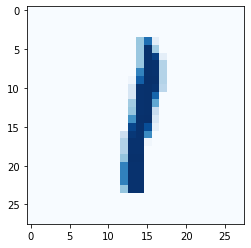

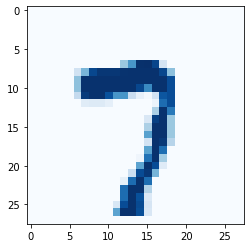

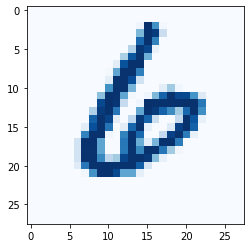

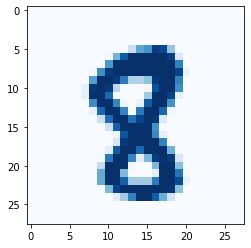

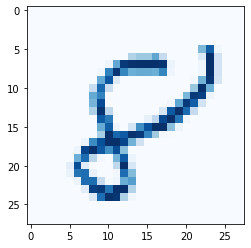

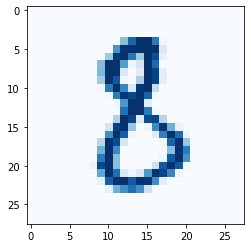

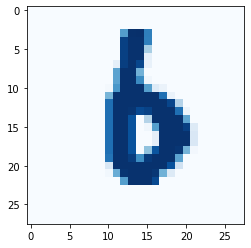

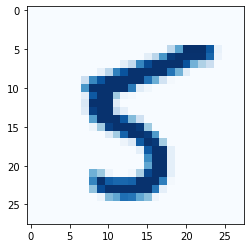

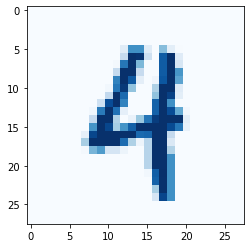

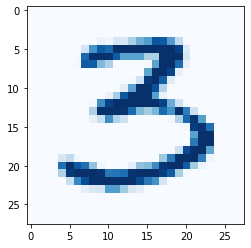

In [ ]:
from collections import ChainMap
from matplotlib.colors import Colormap
def viz_data(X_train):
    X_train_sample = X_train[:10,]
    # TODO: (optional) plot your data with matplotlib
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    Y_train_sample = X_train[:10,]

    for i in range(0,10,1):
      pixels = X_train_sample[i]
      pixels = np.array(pixels, dtype = 'float32')
      pixels = pixels.reshape((28,28))
      plt.imshow(pixels, cmap='Blues')
      plt.show()

viz_data(X_train)

### Model

#### Neural network structure
- For this network, we'll use 2 hidden layers
- Layer 1 should have 128 nodes, a dropout rate of 20%, and relu as its activation function
- Layer 2 should have 64 nodes, a dropout rate of 20%, and relu as its activation function
- The last layer should map back to the 10 possible MNIST class. Use softmax as the activation



In [ ]:
def build_model():
    # TODO: build the model, 
    # HINT: you should have Total params: 109,386
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION

    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')])
    
    
    return model

model = build_model()
predictions = model(X_train[:1]).numpy()
tf.nn.softmax(predictions).numpy()

array([[0.10003974, 0.10000207, 0.09999799, 0.09998591, 0.10000404,
        0.10000823, 0.09996229, 0.09998494, 0.10002153, 0.09999324]],
      dtype=float32)

# Model compilation

- what loss function should you use?
- Note your choice of optimizer
- Include accuracy as a metric (why are we using accuracy here?)

# Model training
- Use a batch size of 128, and train for 12 epochs
- Use verbose training, include validation data


In [ ]:
def compile_model(model):
    # TODO: compile the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
        loss=tf.keras.losses.BinaryCrossentropy(
      from_logits=True, label_smoothing=0.0, axis=-1),
        metrics=[tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.FalseNegatives()])

    return model

def train_model(model, X_train, Y_train, X_val, Y_val):
    # TODO: train the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION


    history = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=128,
    epochs=12,
    verbose="auto",
    validation_data=(X_val, Y_val)

    )
    return model, history


model = compile_model(model)
model, history = train_model(model, X_train, Y_train, X_val, Y_val)

Epoch 1/12


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


274/274 [==============================] - 3s 7ms/step - loss: 0.4408 - binary_accuracy: 0.9000 - false_negatives: 35000.0000 - val_loss: 0.3230 - val_binary_accuracy: 0.9000 - val_false_negatives: 14000.0000
Epoch 2/12
274/274 [==============================] - 2s 6ms/step - loss: 0.3223 - binary_accuracy: 0.9000 - false_negatives: 34990.0000 - val_loss: 0.3009 - val_binary_accuracy: 0.9000 - val_false_negatives: 14000.0000
Epoch 3/12
274/274 [==============================] - 1s 5ms/step - loss: 0.2791 - binary_accuracy: 0.9063 - false_negatives: 32592.0000 - val_loss: 0.2438 - val_binary_accuracy: 0.9093 - val_false_negatives: 12626.0000
Epoch 4/12
274/274 [==============================] - 1s 5ms/step - loss: 0.2321 - binary_accuracy: 0.9138 - false_negatives: 29533.0000 - val_loss: 0.1985 - val_binary_accuracy: 0.9243 - val_false_negatives: 10419.0000
Epoch 5/12
274/274 [==============================] - 1s 5ms/step - loss: 0.1963 - binary_accuracy: 0.9278 - false_negatives: 23563

# Model evaluation
- Show the performance on the test set
- What is the difference between "evaluate" and "predict"?
- Identify a few images the model classifies incorrectly. Any observations?

In [ ]:
def eval_model(model, X_test, Y_test):
    # TODO: evaluate the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION

    # Evaluate the model on the test data using `evaluate`
    print("Evaluate on test data")
    results = model.evaluate(X_test, Y_test, batch_size=128)
    print("test loss, test acc:", results)
    test_loss = results[0]
    test_accuracy = results[1]

    # Generate predictions (probabilities -- the output of the last layer)
    # on new data using `predict`
    print("Generate predictions for 3 samples")
    predictions = model.predict(X_test[:3])
    print("predictions shape:", predictions.shape)

    return test_loss, test_accuracy

test_loss, test_accuracy = eval_model(model, X_test, Y_test)

Evaluate on test data
165/165 [==============================] - 0s 3ms/step - loss: 0.0787 - binary_accuracy: 0.9781 - false_negatives: 2838.0000
test loss, test acc: [0.07866644114255905, 0.9781095385551453, 2838.0]
Generate predictions for 3 samples
predictions shape: (3, 10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


NameError: ignored

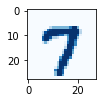

In [ ]:
#Look at an incorrect prediction
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
incorrect = np.where(predicted_classes!=Y_test)[0]

for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='Blues', interpolation='none')
    plt.tight_layout()

np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))

## Further exploration (Not evaluated)
Looking for something else  to do?
- Transform your code to do hyperparameter search. 
- You can vary the number of nodes in the layers, the drop out rate, the optimizer and the parameters in Adam, the batch size, etc.
